# 20. The Simple Recurrent Unit
We are now going to talk about the _**simple recurrent unit**_, also known as the _Elman Unit_. But before we do that, I want to quickly touch on _sequences_. This is going to look slightly different from the data that we are used to.

Recall that our input data $X$ is usually represented with an $NxD$ matrix ($N$ samples and $D$ features); there are no sequences here. Well, let's suppose that we did have a sequence of length $T$. How many dimensions would that require? 

Well, if the observation was a $D$ dimensional vector, and we have $T$ of them, then one sequence of observation will be a $TxD$ matrix. If we have $N$ training samples, then we will end up with an $NxTxD$ matrix, which is a 3 dimensional object. 

Sometimes our sequences are not of equal length, such as the cases with sentences, music, sound, or even someones credit history. How can we handle this? We have encountered this problem in the Hidden Markov Notebooks. The solution is to store each observation in a python list. So, instead of a 3 dimensional matrix, we will have a length $N$ list where each element is a 2-d observation sequence as a numpy array. Because a python list can contain any object as an element, this is okay. 

## 1.1 Simple Recurrent Unit 
Okay, now we can dig into our simple recurrent unit. Take a simple feedforward neural network with one hidden layer: 

<img src="https://drive.google.com/uc?id=1ZTVGTPWR_s98SAt4b7IS97wMrn0DTiUV" width="300">

The input layer and output layer will stay exactly the same, they are actually not part of the recurrent unit itself. However, they are included here for context. What we want to do is create a feedback connection from the hidden layer to itself:

<img src="https://drive.google.com/uc?id=1tGeRQ2PZsHbFq8XFsj32NC3gQ-46ilWZ" width="300">

We can include the weights as well, first a regular feedforward net:

<img src="https://drive.google.com/uc?id=1fpOVWmY2Wos-JqWM7dmOx8SXRlMJhWQj" width="300">

And a recurrent net:

<img src="https://drive.google.com/uc?id=19HBt3NRTF9js20EJeYvekBI6QITmNGoO" width="300">

Notice that the feedback loop implies that there is a delay of one time unit. So, one of the input units into $h(t)$ is $h(t-1)$. 

A question that you may have is: How big is $W_h$? Just like the other layers, we connect "everything-to-everything". So, if there are $M$ hidden units, the first hidden unit connects back to all $M$ units, the second hidden unit connects back to all $M$ units, and so on. In total there will be $M^2$ hidden to hidden weights. Hence, $W_h$ is an $MxM$ matrix. 

### 1.1.1 Simple Recurrent Mathematical Output
Here is how we would represent the output of a recurrent net in math:

$$h(t) = f \big(W_h^T h(t-1) + W_x^T x(t) + b_h\big)$$

$$y(t) = softmax\big(W_o^T h(t) + b_o\big)$$

Note that the feedback connection represents a time delay of 1, so the hidden layer takes in both $x$ and its last hidden value. Also, note that $f$ can be any of the usual nonlinearities, such as the sigmoid, tanh, or ReLu. 

## 1.2 Not The Markov Assumption
One thing that is worth noting is that this is not the Markov Assumption. Why is that? Well, even though $h(t)$ is defined in terms of its previous value, it's previous value can be defined in terms of the value before that, and so on:

$$h(t) = f \big(W_h^T h(t-1) + W_x^T x(t) + b_h\big)$$

$$h(t) = f \Big(W_h^T f \big( W_h^T h(t-2) + W_x^T x(t-1) + b_h \big) + W_x^T x(t) + b_h\Big)$$

This also means that $h(t)$ has to have an initial state, $h(0)$. Sometimes researchers will set this to 0, and other times it will be a hyperparameter that we can use back propagation on. Since theano automatically differentiates things for us, we will treat it as an updatable parameter. 

## 1.3 More Layers 
One question you may have is can we add more than one recurrent unit to the network:

<img src="https://drive.google.com/uc?id=1gUgdG48Pz3H1oEQIXz_huhugWMt858-W" width="400">

The answer is yes! The number of recurrent layers is a hyperparameter, just like how the number of hidden layers is a parameter for a regular feed forward net. The question of how many depends on your type of specific problem. 

And that is all there is to it! Just by adding that one hidden layer, we have created a recurrent neural network! We will see in the coding networks how this can already do some amazing things, such as exponentially decrease the number of hidden units we would have needed in a feed forward neural network. 

---

# 2. Prediction and Relationship to Markov Models
We are now going to look more closely at what a recurrent neural network can predict, and talk about how under certain circumstances, we can relate it back to what we know about Markov Models. 

Adding a time component gives us a few more options in terms of the objective, or in other words _what we are trying to predict_. 

## 2.1 Softmax
Let's being by talking about something we know already: Softmax and Multiclass classification. So, suppose we take an entire sequence, and take the argmax of the softmax, and use that as the class:

$$Prediction = argmax_k \big( p(y=k \mid x)\big) = argmax_k \big( softmax(W_o^T h(t)) + b_o\big)$$

What assumption have we made? Well, first and foremost we forgot about the time component, but we will get to that shortly. The thing that we are assuming is that the entire sequence corresponds to one class. This makes perfect sense for a lot of problems. For example, if we wanted to classify between male and female voices, you would have sound samples from males and females. If you were looking at one sound file of a male saying "Hello world", the class for that sample is male; one sequence, one label. 

$$Prediction(t) = argmax_k \big( p(y(t)=k \mid x)\big) = argmax_k \big( softmax(W_o^T h(t)) + b_o\big)$$

But, we can't forget that for every $h(t)$ there is a $y(t)$. $y(t)$ is just the final layer calculated from $h(t)$. So, technically we could have a label for every time step.

What are some situations where this may be useful? Well, let's think about brain computer interfaces. These are systems that are constantly reading electrical signals from your brain. Suppose the purpose of this brain computer interface is for controlling a wheelchair. Considering the wheelchair is how you will get around, you will need fine grain controll on the device. So, it moves forward, stops, turns left, etc, when you want it to. These would be our labels:

$$Labels = \{ forward, stop, left, right, back\}$$ 

We want the action to be taken right as we think of it. In this case we would need a $y(t)$ for every $x(t)$. So this is precisely a situation where we would want to have not just one label for one sequence, but one label for every moment in time. 

Let's now consider a third situation. Suppose we are looking at a sequence of words, or in other words, sentences. As is typical, we want to predict the next word given all of the previous words (our target is the previous word). What is interesting about this is that it is essentially unsupervised learning, since there is essentially no target label-the target is just the input. In other words, we are trying to model the probability:

$$p\big( x(t) \mid x(t-1), x(t-2),...,x(1)\big)$$

Remember that the current hidden state depends on all of the previous hidden states, so this is _not_ the markov assumption. Consider what happens when we try to make the whole input sequence the target sequence; we are trying to model the probability: 

$$p\big(x(1)\big)p\big(x(2) \mid x(1)\big)p\big(x(3) \mid x(2), x(1)\big)...$$

Now, what happens if we join the first two terms together? Using bayes rule we get the joint probability of $p\big( x(2), x(1)\big)$:

$$p\big( x(2), x(1)\big))p\big(x(3) \mid x(2), x(1)\big)...$$

Now, if we join the first two terms of that together, we get:

$$p\big( x(3), x(2), x(1)\big)$$

This is known as the chain rule of probability. Eventually what we end up with is just the joint probability of the entire sequence.

## 2.2 Joint Probability
That is very interesting, because it is exactly what we are trying to optimize with Hidden Markov Models! So, we can see that with Recurrent Neural Networks we can optimize the same thing as HMM's, but without making the markov assumption. This could lead us to the intuition that these RNN's may be more powerful. 

Another advantage is that, if you recall, HMM's suffer from the fact that longer sequences have probabilities that go down to zero, because you are continually multiplying values together that are less than 1. Luckily, we don't have that problem with RNN's, and the fact that we have the joint probability is implicit in the model itself, so there is no need to calculate it. 

## 2.3 Summary
To conclude, we have identified 3 different ways of using RNN's for prediction. 
> 1. Predict one label over entire sequence (e.g. differentiate between male and female voices.
2. Predict a label for every step of input sequence (e.g. control device using BCI)
3. Predict the next value in a sequence (e.g. next word in sequence)

---

# 3. Unfolding a Recurrent Neural Network
Because time is a somewhat invisible notion in the recurrent neural network architecture, this section is about visualizing the RNN in terms of a feedforward neural network. One key idea that returns here is the idea of shared weights. 

Imagine we have a sequence of length 5, if we were to unfold the RNN in time, such that it has no recurrent connections at all, we would get this feed forward neural network with 5 hidden layers. 

<img src="https://drive.google.com/uc?id=1aPEj0Q7T42nbs0Fqy4wtoJKdx5ec31sh" width="700">

It is as if $h(0)$ is the input, and each $x(t)$ is just some additional control signal at each step. We can see that the hidden to hidden weight, $w_h$, is just repeated at every layer. So, it is like a deep network with the same shared weight between each layer. Similarly, $w_x$ is shared between each of the five $x$'s going into the hidden layers. 

---

# 4. Backpropagation Through Time 
We are now going to return through backpropagation as a mental exercise. Note, in code we are going to use Theano and Tensorflow to calculate the gradients for us. This would be useful if you were to write a Recurrent Neural Network from scratch. 

If you recall the notebooks on vanilla deep learning, you may remember that **backpropagation** is just a fancy name for gradient descent. It has some interesting properties, but the entire idea lies behind _**calculating the gradient**_ and _**moving in that direction**_. 

Similary, _**Backpropagation through time**_, often shortened to **BPTT**, is just a fancy name for backpropagation, which itself is just gradient descent. So what does that mean for us? That means that in the code, updating all of the weights is going to exactly the same, which makes things very easy for us:

```
W = W - \alpha*T.grad(cost, W)
```

## 4.1 Recurisive Nature 
However, we are still interested in taking the gradient. First, let's consider what our neural network outputs above would be calculated as (use the diagram for reference):

**Solve $y(1)$**
$$y(1) = softmax\big(W_o^Th(1)\big)$$

**Solve $y(2)$**
$$y(2) = softmax\big(W_o^Th(2)\big)$$

$$h(2) = f\big(W_x^T x(2) + W_h^T h(1)\big)$$

$$y(2) = softmax\big(W_o^T f\big(W_x^T x(2) + W_h^T h(1)\big) \big)$$

**Solve $y(3)$**
$$y(3) = softmax\big(W_o^Th(3)\big)$$

$$h(3) = f\big(W_x^T x(3) + W_h^T h(2)\big)$$

$$h(3) = f\Big(W_x^T x(3) + W_h^T f\big(W_x^T x(2) + W_h^T h(1)\big)\Big)$$

$$y(3) = softmax\Big\{W_o^T f\Big(W_x^T x(3) + W_h^T f\big(W_x^T x(2) + W_h^T h(1)\big)\Big)\Big\}$$

**General Pattern**<br>
We could continue this for $y(4)$ and $y(5)$, but instead let us write out the general pattern:

$$y(t) = softmax \big(W_o^T h(t) \big)$$

$$y(t) = softmax \Big(W_o^T f\big(W_h^T h(t-1) + W_x^T x(t) \big) \Big)$$

$$y(t) = softmax\Big\{W_o^T f\Big(W_x^T x(t) + W_h^T f\big(W_x^T x(t-1) + W_h^T h(t-2)\big)\Big)\Big\}$$

## 4.2 How Does Error Change With Respect to our Weights?
The pattern of our output can clearly be seen above. 

#### 4.2.1 Derivative of Error With Respect to $W_o$
Note, our output weight, $W_o$, occurs _after_ the recurrence, so we do not need to consider time in that case. Hence, when trying to determine how our error, $J$, changes with respect to the output weight, we can calculate the derivative as normal (for more detail please see my post on Neural Network Training):

$$\frac{dJ}{dW_o} = \frac{\partial J}{\partial y}\frac{\partial y}{\partial a}\frac{\partial a}{\partial W_o}$$

#### 4.2.1 Derivative of Error With Respect to $W_h$
However, we have to be more careful when determining how the error changes with respect to $W_h$. If we look at the derivative of $J$ with respect to $W_h$:

$$\frac{dJ}{dW_h} = \frac{\partial J}{\partial a}\frac{\partial a}{\partial h}\frac{\partial h}{\partial W_h}$$

In order to best demonstrate this and make the idea more concrete, let's look specifically node 3 and how the error, $J_3$, changes as we change $W_h$:

<img src="https://drive.google.com/uc?id=1y-pmfwOHpW2iHiF_v1VbmCU-cpstMTLT" width="650">

$$\frac{dJ_3}{dW_h} = \frac{\partial J_3}{\partial a_3}\frac{\partial a_3}{\partial h_3}\frac{\partial h_3}{\partial W_h}$$

The first term of that derivative is no problem, it is simply:

$$\frac{\partial J_3}{\partial a_3} = \frac{\partial J_3}{\partial y_3}\frac{\partial y_3}{\partial a_3}$$

And the second is also taken care of easily:

$$a_3 = W_o^Th_3$$

$$\frac{\partial a_3}{\partial h_3} = W_o^T$$

The third term in that derivative, $\frac{\partial h_3}{\partial W_h}$, is where we run into problems. Recall, that $h_3$ was determined to be:

$$h(3) = f\big(W_x^T x(3) + W_h^T h(2)\big)$$

And hence we can rewrite our derivative as: 

$$\frac{\partial h_3}{\partial W_h} = \frac{\partial f\big(W_x^T x(3) + W_h^T h(2)\big)}{\partial W_h}$$

To make our example more concrete, we will let our activation function, $f$, be the $tanh$ function:

$$\frac{\partial h_3}{\partial W_h} = \frac{\partial \Big \{ tanh\big(W_x^T x(3) + W_h^T h(2)\big) \Big \}}{\partial W_h}$$

Now, we can perform the chain rule and up with the following:

$$\frac{\partial h_3}{\partial W_h} = \overbrace{sech^2\big(W_x^T x(3) + W_h^T h(2)\big)}^\text{Outer } * \overbrace{\frac{ \partial \big(W_x^T x(3) + W_h^T h(2) \big)}{\partial W_h}}^\text{Inner}$$

The inner derivative is where we start to run into issues. We can drop $W_x^T x(3)$, considering it does not depend on $W_h$. However, we are still left with a product of _two_ terms which are a function of $W_h$, $W_h^T*h(2)$. This means that we need to use the _product rule_ in order to solve the derivative. If we let $a$ and $b$ equal (dropping the transpose on our matrices to increase readability):

$$a = h(2)$$

$$b = W_h$$

Then, be the product rule, the derivative of $(a*b)'$ is:

$$(a*b)' = a'*b + b'*a$$

Recall, $h(2)$ was defined as:

$$h(2) = tanh\big(W_x x(2) + W_h h(1)\big)$$

So, $a$ can be written as:

$$a = tanh\big(W_x x(2) + W_h h(1)\big)$$

$$(a*b)' = \overbrace{ \frac{\partial \Big \{ tanh \big(W_x x(2) + W_h h(1)\big) \Big \} }{\partial W_h}}^\text{a'} * \overbrace{W_h}^\text{b} + \overbrace{1}^\text{b'} *\overbrace { tanh\big(W_x x(2) + W_h h(1)\big)}^\text{a}$$

But wait! We once again run into an issue where in order to find $a'$ we need to use the chain rule:

$$a' = \frac{\partial \Big \{ tanh \big(W_x x(2) + W_h h(1)\big) \Big \} }{\partial W_h}$$

So, we can go ahead and work that out:

$$a' = \frac{\partial h_2}{\partial W_h} = \overbrace{sech^2\big(W_x x(2) + W_h h(1)\big)}^\text{Outer } * \overbrace{\frac{\partial\big( W_x x(2) + W_h h(1) \big)}{\partial W_h}}^\text{Inner}$$

And again, we run into problems with the inner derivative! We can drop the first term since it does not depend on $W_h$, but that still leaves us with:

$$\frac{\partial\big( W_h h(1) \big)}{\partial W_h}$$

Clearly, we need to use the product rule since we have two terms being multiplied which both depend on the variable we are taking the derivative with respect to ($W_h$). Let us again use $a$ and $b$ to represent our terms:

$$a = h(1)$$

$$a = tanh\big(W_x x(1) + W_h h(0)\big)$$

$$b = W_h$$

And utilize the product rule:

$$(a*b)' = \overbrace{ \frac{\partial \Big \{ tanh \big(W_x x(1) + W_h h(0)\big) \Big \} }{\partial W_h}}^\text{a'} * \overbrace{W_h}^\text{b} + \overbrace{1}^\text{b'} *\overbrace { tanh\big(W_x x(1) + W_h h(0)\big)}^\text{a}$$

The trend should be very clear at this point: 

> We are continually going to be alternating back and forth, recursively, between the chain rule and product rule until we hit our base case/starting point. 

We can see that $a'$ will require the chain rule:

$$a' = \frac{\partial h_1}{\partial W_h} = \overbrace{sech^2\big(W_x x(1) + W_h h(0)\big)}^\text{Outer } * \overbrace{\frac{\partial\big( W_x x(1) + W_h h(0) \big)}{\partial W_h}}^\text{Inner}$$

However, we have finally reached a base case and will _not_ require another product rule! The inner derivative, which is:

$$\frac{\partial\big( W_x x(1) + W_h h(0) \big)}{\partial W_h}$$

Can have the first term dropped, and we can substitute in $h(0)$:

$$\frac{\partial\Big( W_h * tanh\big(W_x x(0)\big)\Big)}{\partial W_h}$$

We see that only the first term in this product depends on $W_h$, and hence our derivative is just:

$$\frac{\partial\Big( W_h * tanh\big(W_x x(0)\big)\Big)}{\partial W_h} = 1 * tanh\big(W_x x(0)\big) $$

The main takeaway from this process should be the intuition that because of the recurrent net is defined, there will be a recursive process of the chain rule leading the product rule which leads back to the chain rule, and so on, down to our base case. This same process will occur when dealing with $\frac{\partial J}{\partial W_x}$, however, we need not go through all of the steps for sake of redundancy. Keep this intuition in mind as we discuss the _parity problem_ and the _vanishing gradient_ in the next sections.

One final thing to keep in mind, recall from earlier posts regarding deep learning that a weight gets updated via an _error signal_ from whatever nodes it influences when it goes in the forward direction. Below, we can see the influence of $w_h$ in red:

<img src="https://drive.google.com/uc?id=15Tokk-VRfYQ9JzCPZFYI43x7GlyQs7rb" width="700">

The upward arrows going to the output $y$ only matter if you are considering that as a part of your output. This will be different depending on whether you have a target for every time step, or a target just at the end of a sequence. The arrows going from left to right must always be backpropagated, because these are the hidden to hidden weights. 

## 4.2 Vanishing Gradient / Exploding Gradient
One thing to realize here is that the same things are going to be multiplied again and again due to the chain rule of calculus. This will happen for both the hidden to hidden weights, as well as the input to hidden weights. The result is that you will either have something that goes down to 0, or gets large very quickly. This is referred to as the _vanish gradient_ and _exploding gradient_ problem respectively. 

One solution to this is **gradient clipping**. It is a pretty simple algorithm, as can be seen from the pseudocode below:

```
g = derivative_error_wrt_weights
if ||g|| >= threshold:
    g = g * (threshold / ||g||)
```

## 4.3 Truncated BPTT
Another modification of back propagation through time is **truncated backpropagation through time**. Because the derivatives of $W_h$ and $W_x$ depend on every single time step of the sequence so far, the calculation will take a very long time for very long sequences. One approximation is just to stop after a certain number of time steps. One disadvantage of this is that it won't incorporate the error at longer periods of time. However, if you don't care about dependencies at greater than 3 time steps, then you can just truncate at 3 time steps. 

---

# 5. The Parity Problem 
We are now going to go back to the _XOR_ problem, but with an additional twist. Recall, the XOR problem is simply to implement the XOR logic gate using a neural network. The result is a zero if the two inputs are the same, and the result is a 1 if the two inputs are different:

|input 1| input 2| output|
|---|---|---|
|0|0|0|
|1|1|0|
|1|0|1|
|0|1|1|

One obvious way to extend this problem is to add more inputs (bits):
* The label is 1 if the number of bits that are 1 is odd
* The label is 0 if the number of bits that are 1 is even 

### 5.1 Background
Just for a bit of background, I should mention that the parity problem occurs in a few different places in computer science. One application is data transmission in communication systems. If you imagine that a source is trying to send a bit stream to a receiver, but one of the bits gets reversed via noise, how can we detect this? One simple way to do this is to add a parity bit to the end of each message. We set a requirement that each message must have an even number of ones, and if the actual message has an odd number of ones, we will make the parity bit a one to make the total even. If the actual message already has an even number of ones, we will make the parity bit a zero so that the total is still even. For example:

$$\text{M = 0 1 0 1} \rightarrow \text{P = 0} \rightarrow \text{Transmit: 0 1 0 1 0}$$

This way, when the receiver gets the message, it can check how many ones their are, and if it is odd then we know something has gone wrong in the transmission of the message. 

### 5.2 Why Not Use A Regular Feedforward Net
If you were to try and solve the parity problem with a regular feedforward net, you will see that the number of hidden units will grow very fast compared to the number of bits. For example, if for one bit, we would need two hidden units. As we jumped to 12 bits, we would need:

$$2^{11} = 2048$$

We can mitigate this problem by creating deeper networks with less units per layer. 

### 5.3 Solving the Parity Problem with RNNs
The basic idea here is that we would like the Neural Network to keep track of its state. So, if the output is 0 and we see another 1 in the input, we would like to switch to a 1. If the output is 1 and we see another 1 in the input, we would like to switch to a 0. If we see a 0 in the input, we would just like to maintain whatever the current output is. 

Can our RNN actually do this? Well, before answering that, let's think about what type of labeling we are dealing with; there are 3 different types:

1. One label for every sequence.
2. **T labels for sequence of length T**.
3. No labels, we just want to predict the next observation.

This is clearly type 2, where we care about the output at every point in time. To do this, we will need to discard the original label (which is just one number), and create a sequence of labels, which will be a sequence of the same size as the input, which just keeps a tally of whether it has seen an even or odd number of inputs so far. 

**Example**<br>
Let's go through an example; suppose we are working with a dimensionality of 4. Then our possible inputs are:

|input 1| Target | Sequence Target|
|---|---|---|
|0000|0|0000|
|0001|1|0001|
|0010|1|0011|
|0011|0|0010|
|0100|1|0111|
|0101|0|0110|
|0110|0|0100|
|0111|1|0101|
|...|...|...|

Remember, the entire purpose of our `sequence targets` is to keep track of whether we have seen an even or odd number of ones so far. So, the last number in our `sequence targets` will always be equivalent to the number in the `Targets` column. 

### 5.4 The Parity Problem in Code using a FeedForward Net

In [4]:
import numpy as np 
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

from rnn_util import init_weight, all_parity_pairs
from sklearn.utils import shuffle

In [11]:
"""Create MLP (Multi Layer Perceptron)"""
class HiddenLayer:
  "Takes in input size (M1), output size (M2), and an id."
  def __init__(self, M1, M2, an_id):
    self.M1 = M1
    self.M2 = M2
    self.id = an_id
    W = init_weight(M1, M2) # Initialize weights to be small and random
    b = np.zeros(M2)
    
    # Initialized Theano shared variables (id used for debugging purposes) 
    self.W = theano.shared(W, 'W_%s' % self.id)
    self.b = theano.shared(b, 'b%s' % self.id)
    self.params = [self.W, self.b]
    
  def forward(self, X):
    # nnet is ops for neural networks in theano. 
    return T.nnet.relu(X.dot(self.W) + self.b)
  
class ANN:
  "ANN class will make use of hidden layer class."
  def __init__(self, hidden_layer_sizes):
    # This is a list containing the sizes of each hidden layer
    self.hidden_layer_sizes = hidden_layer_sizes 
    
  def fit(self, X, Y, learning_rate=1e-2, mu=0.99, reg=1e-12, epochs=400, 
          batch_sz=20, print_period=1, show_fig=False):
    
    Y = Y.astype(np.int32)
    
    # Initialize hidden layers 
    N, D = X.shape
    K = len(set(Y))
    self.hidden_layers = []
    M1 = D # First hidden layer size is equal to the dimensionality of our input
    count = 0 
    # Loop through hidden layer sizes
    for M2 in self.hidden_layer_sizes:
      h = HiddenLayer(M1, M2, count)
      self.hidden_layers.append(h)
      M1 = M2 # The output layer will be the input of the next layer
      count += 1
    # These are for the logistic regression layer
    W = init_weight(M1, K)
    b = np.zeros(K)
    # Need to make these theano shared variables
    self.W = theano.shared(W, 'W_logreg')
    self.b = theano.shared(b, 'b_logreg')
    
    self.params = [self.W, self.b]
    for h in self.hidden_layers: 
      self.params += h.params
    
    # For momentum 
    # .get_value() is a theano function
    dparams = [theano.shared(np.zeros(p.get_value().shape)) for p in self.params]
    
    # Setup Theano functions and variables. Input is a matrix, 
    # target is a vector, P of Y given X is self.forward.
    thX = T.matrix('X')
    thY = T.ivector('Y')
    pY = self.forward(thX)
    
    # Regularization cost - Sum over square of all params
    rcost = reg*T.sum([(p*p).sum() for p in self.params])
    
    # Full cost. Cross entropy, plus regularization 
    # pY[T.arange(thY.shape[0]), thY] represents our predictions,
    # pY, which we then select values based on the indices passed in 
    # T.arange(thY.shape[0]), thY. T.arange(thY.shape[0]) will be a 
    # vector of the shape [1,2,3,...,len(thY)], while thY represents 
    # our targets, a vector of the same length as that above, but holding
    # our targest now, i.e. [4,1,6,2,7,2...9]. We then take the log of 
    # each value in the vector (T.log is elementwise), and then take the 
    # mean of the entire vector. Finally, we add the regularization cost.
    cost = -T.mean(T.log(pY[T.arange(thY.shape[0]), thY])) + rcost
    prediction = self.predict(thX)
    grads = T.grad(cost, self.params)
    
    # Define our updates - momentum only. Note, dp stands for velocity (used in momentum)
    # See section 1.2 in momentum post.
    updates = [
      (p, p + mu*dp - learning_rate*g) for p, dp, g in zip(self.params, dparams, grads)
    ] + [
      (dp, mu*dp - learning_rate*g) for dp, g in zip(dparams, grads)
    ]
    
    # Train operation. Theano function. 
    train_op = theano.function(
      inputs=[thX, thY],
      outputs=[cost, prediction],
      updates=updates
    )
    
    n_batches = N // batch_sz
    costs = []
    
    # Main training loop
    for i in range(epochs):
      # Shuffle before we begin each epoch
      X, Y = shuffle(X, Y)
      # Loop through each batch
      for j in range(n_batches):
        Xbatch = X[j*batch_sz:(j*batch_sz + batch_sz)]
        Ybatch = Y[j*batch_sz:(j*batch_sz + batch_sz)]
        
        # Get cost and prediction from train_op
        c, p = train_op(Xbatch, Ybatch)
        
        if j % print_period == 0:
            costs.append(c)
            e = np.mean(Ybatch != p)
#             print("i:", i, "j:", j, "nb:", n_batches, "cost:", c, "error rate:", e)
            
    if show_fig:
      plt.plot(costs)
      plt.show()
      
  def forward(self, X):
    Z = X
    # Loop through all hidden layers
    for h in self.hidden_layers:
      Z = h.forward(Z)
    return T.nnet.softmax(Z.dot(self.W) + self.b) # Softmax is last layer
  
  def predict(self, X):
    pY = self.forward(X)
    return T.argmax(pY, axis=1)
  
def wide():
  "Creates a wide net, with only 1 layer."
  X, Y = all_parity_pairs(12)
  model = ANN([2048]) # 2048 hidden units
  model.fit(X, Y, learning_rate=1e-4, print_period=50, epochs=300, show_fig=True)
  
def deep():
  "Creates a wide net, with 2 layers."
  X, Y = all_parity_pairs(12)
  model = ANN([1024]*2)
  model.fit(X, Y, learning_rate=1e-3, print_period=50, epochs=100, show_fig=True)

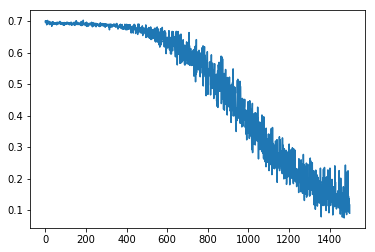

In [12]:
if __name__ == '__main__':
#   wide()

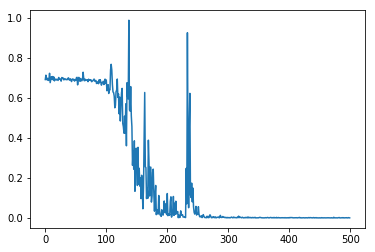

In [13]:
if __name__ == '__main__':
#   deep()